# Import Libreries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load cleaned data

In [5]:
file_path = "/Users/dela/Documents/DataSet happiness reports/DATA/Prepared data/cleaned_2019.csv"
df = pd.read_csv(file_path)


In [7]:
df.head()


,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Step 2: Select Variables for Exploratory Analysis


In [9]:
df = df.drop(columns=['overall_rank'])
print(df.columns)


Index(['country_or_region', 'score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')


# Step 3: Correlation Matrix Heatmap


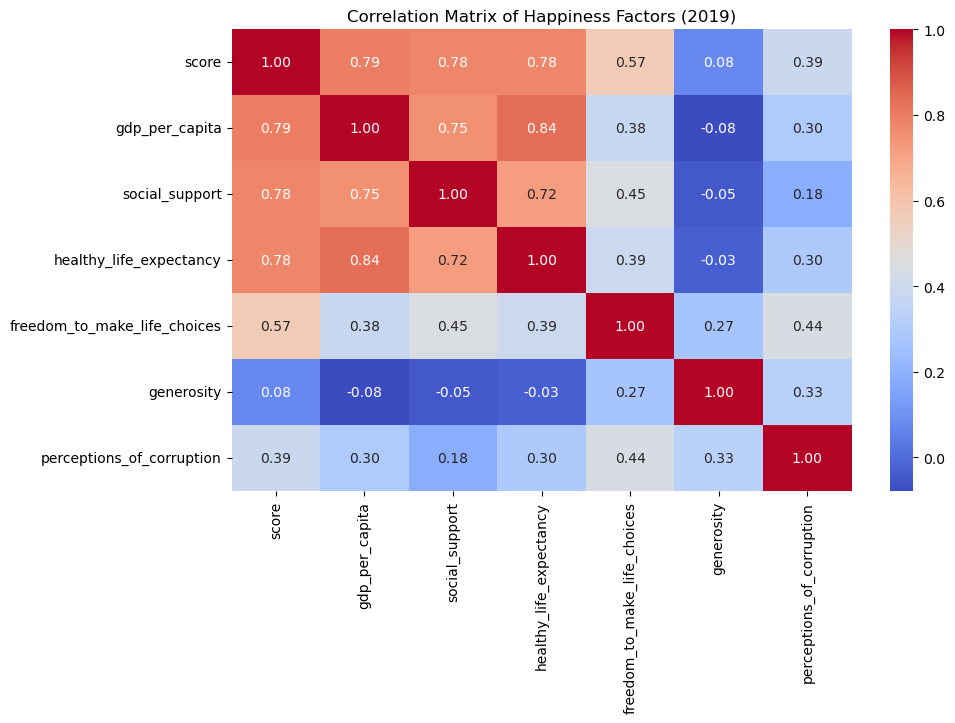

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Happiness Factors (2019)")
plt.show()


# Correlation Matrix Analysis of Happiness Factors (2019)


## Key Observations from the Correlation Matrix

### **1. Happiness Score (`score`) Correlations:**
- **Strong positive correlation with `gdp_per_capita` (0.79)** → Wealthier countries tend to have higher happiness scores.
- **Strong correlation with `social_support` (0.78) and `healthy_life_expectancy` (0.78)** → Countries with strong social systems and better healthcare tend to be happier.
- **Moderate correlation with `freedom_to_make_life_choices` (0.57)** → More freedom contributes to happiness but less than economic and health factors.
- **Weaker correlation with `perceptions_of_corruption` (0.39)** → Less corruption is somewhat associated with happiness.
- **Minimal correlation with `generosity` (0.08)** → Surprisingly, generosity does not significantly impact happiness.

---

### **2. GDP per Capita (`gdp_per_capita`) Correlations:**
- **Highest correlation with `healthy_life_expectancy` (0.84)** → Wealthier nations invest more in healthcare.
- **High correlation with `social_support` (0.75)** → Richer countries tend to have stronger social support systems.
- **Moderate correlation with `freedom_to_make_life_choices` (0.38)** → Economic stability allows for more freedom.

---

### **3. Social Support (`social_support`) Correlations:**
- **Strong correlation with `score` (0.78) and `gdp_per_capita` (0.75)** → A strong social system leads to happiness and economic development.
- **Moderate correlation with `healthy_life_expectancy` (0.72)** → Better healthcare often accompanies strong social support.

---

### **4. Healthy Life Expectancy (`healthy_life_expectancy`) Correlations:**
- **Strong correlation with `gdp_per_capita` (0.84)** → Economic stability leads to better healthcare.
- **Moderate correlation with `social_support` (0.72)** → Countries with strong communities often have better health outcomes.
- **Moderate correlation with `freedom_to_make_life_choices` (0.39)** → Healthier populations tend to have more autonomy.

---

### **5. Freedom to Make Life Choices (`freedom_to_make_life_choices`) Correlations:**
- **Moderate correlation with `score` (0.57)** → More freedom leads to higher happiness.
- **Moderate correlation with `perceptions_of_corruption` (0.44)** → Freer societies tend to have lower corruption.
- **Weaker correlation with `gdp_per_capita` (0.38)** → Wealth does not always mean personal freedom.

---

### **6. Generosity (`generosity`) Correlations:**
- **Weak or negative correlations with all variables** → Generosity does not significantly affect happiness, health, or wealth.
- **Slight correlation with `perceptions_of_corruption` (0.33)** → More generous countries may have less corruption.

---

### **7. Perceptions of Corruption (`perceptions_of_corruption`) Correlations:**
- **Moderate correlation with `freedom_to_make_life_choices` (0.44)** → People in freer societies tend to perceive lower corruption.
- **Weak correlation with happiness (`score`: 0.39), GDP (0.30), and social factors** → Corruption is a factor in well-being but not as strong as economic or social elements.

---

## **Conclusion**
The correlation matrix confirms that **economic factors (GDP per capita), social support, and health expectancy are the strongest predictors of happiness.** On the other hand, **generosity and perceptions of corruption show much weaker relationships with happiness.** 

---


# Step 4: Scatterplots and Examining Relationships

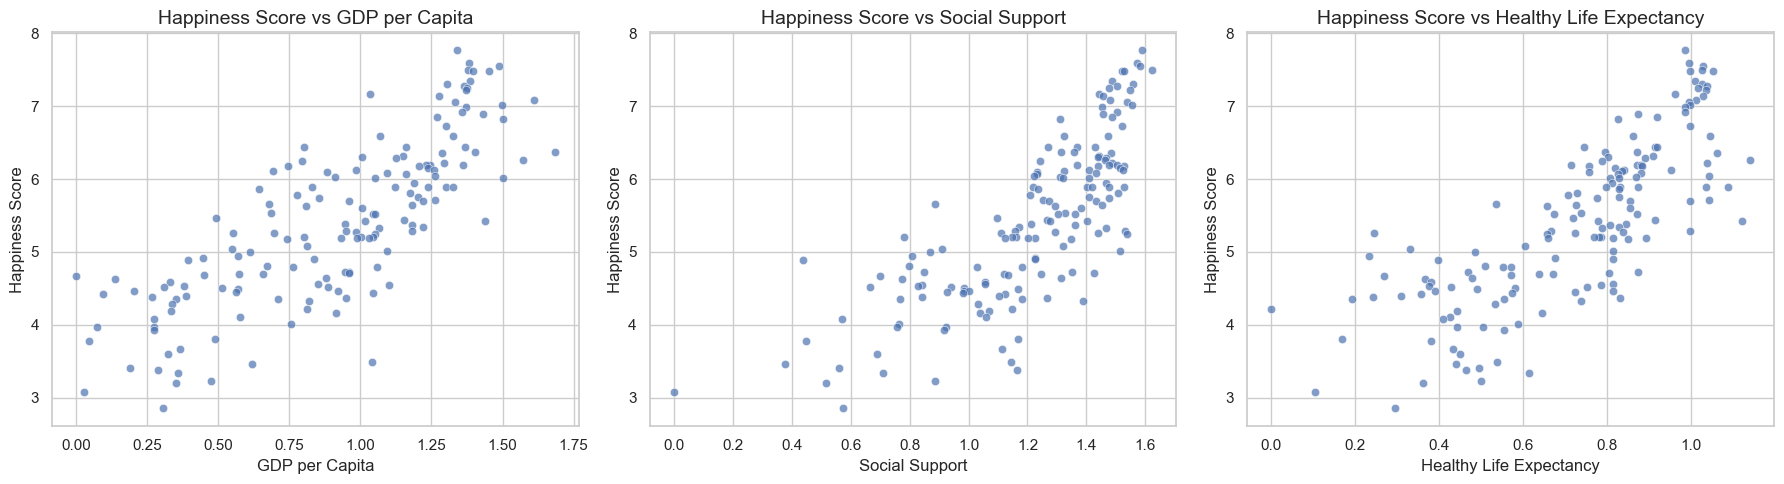

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Define variables for plotting
strongest_correlations = [
    ("gdp_per_capita", "GDP per Capita"),
    ("social_support", "Social Support"),
    ("healthy_life_expectancy", "Healthy Life Expectancy")
]

# Create scatterplots
plt.figure(figsize=(18, 5))

for i, (var, label) in enumerate(strongest_correlations, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=var, y="score", alpha=0.7)
    plt.xlabel(label, fontsize=12)
    plt.ylabel("Happiness Score", fontsize=12)
    plt.title(f"Happiness Score vs {label}", fontsize=14)

plt.tight_layout()
plt.show()


# Scatterplot Analysis

## Key Insights from Scatterplots

### **1. GDP per Capita vs. Happiness Score**
- The scatterplot reveals a **strong positive correlation (0.79)** between **GDP per capita** and **happiness score**.
- Countries with **higher economic wealth** tend to report **higher happiness**.
- However, the relationship is **not perfectly linear**, suggesting that **beyond a certain level of wealth, GDP per capita contributes less to happiness** (diminishing returns effect).

### **2. Social Support vs. Happiness Score**
- The scatterplot shows a **strong correlation (0.78)** between **social support** and **happiness**.
- Countries with **strong social networks and support systems** tend to have **happier populations**.
- The data suggests that **social well-being is as important as economic wealth** in determining happiness.

### **3. Healthy Life Expectancy vs. Happiness Score**
- A **strong correlation (0.78)** indicates that **countries with longer life expectancies tend to be happier**.
- This suggests that **health is a key factor in overall well-being**.
- The pattern is fairly linear, meaning that **improving health conditions directly contributes to happiness**.

## Conclusion
The scatterplots confirm the findings from the correlation heatmap:
1. **Economic stability (GDP per capita)**, **social networks**, and **healthcare** are **key drivers of happiness**.
2. **Beyond a certain wealth level, GDP per capita has diminishing returns on happiness.**
3. **Social support and life expectancy have a strong direct impact on happiness, making them essential policy targets for well-being improvement.**



# Step 5: Generate the Pair Plot


<Figure size 1200x800 with 0 Axes>

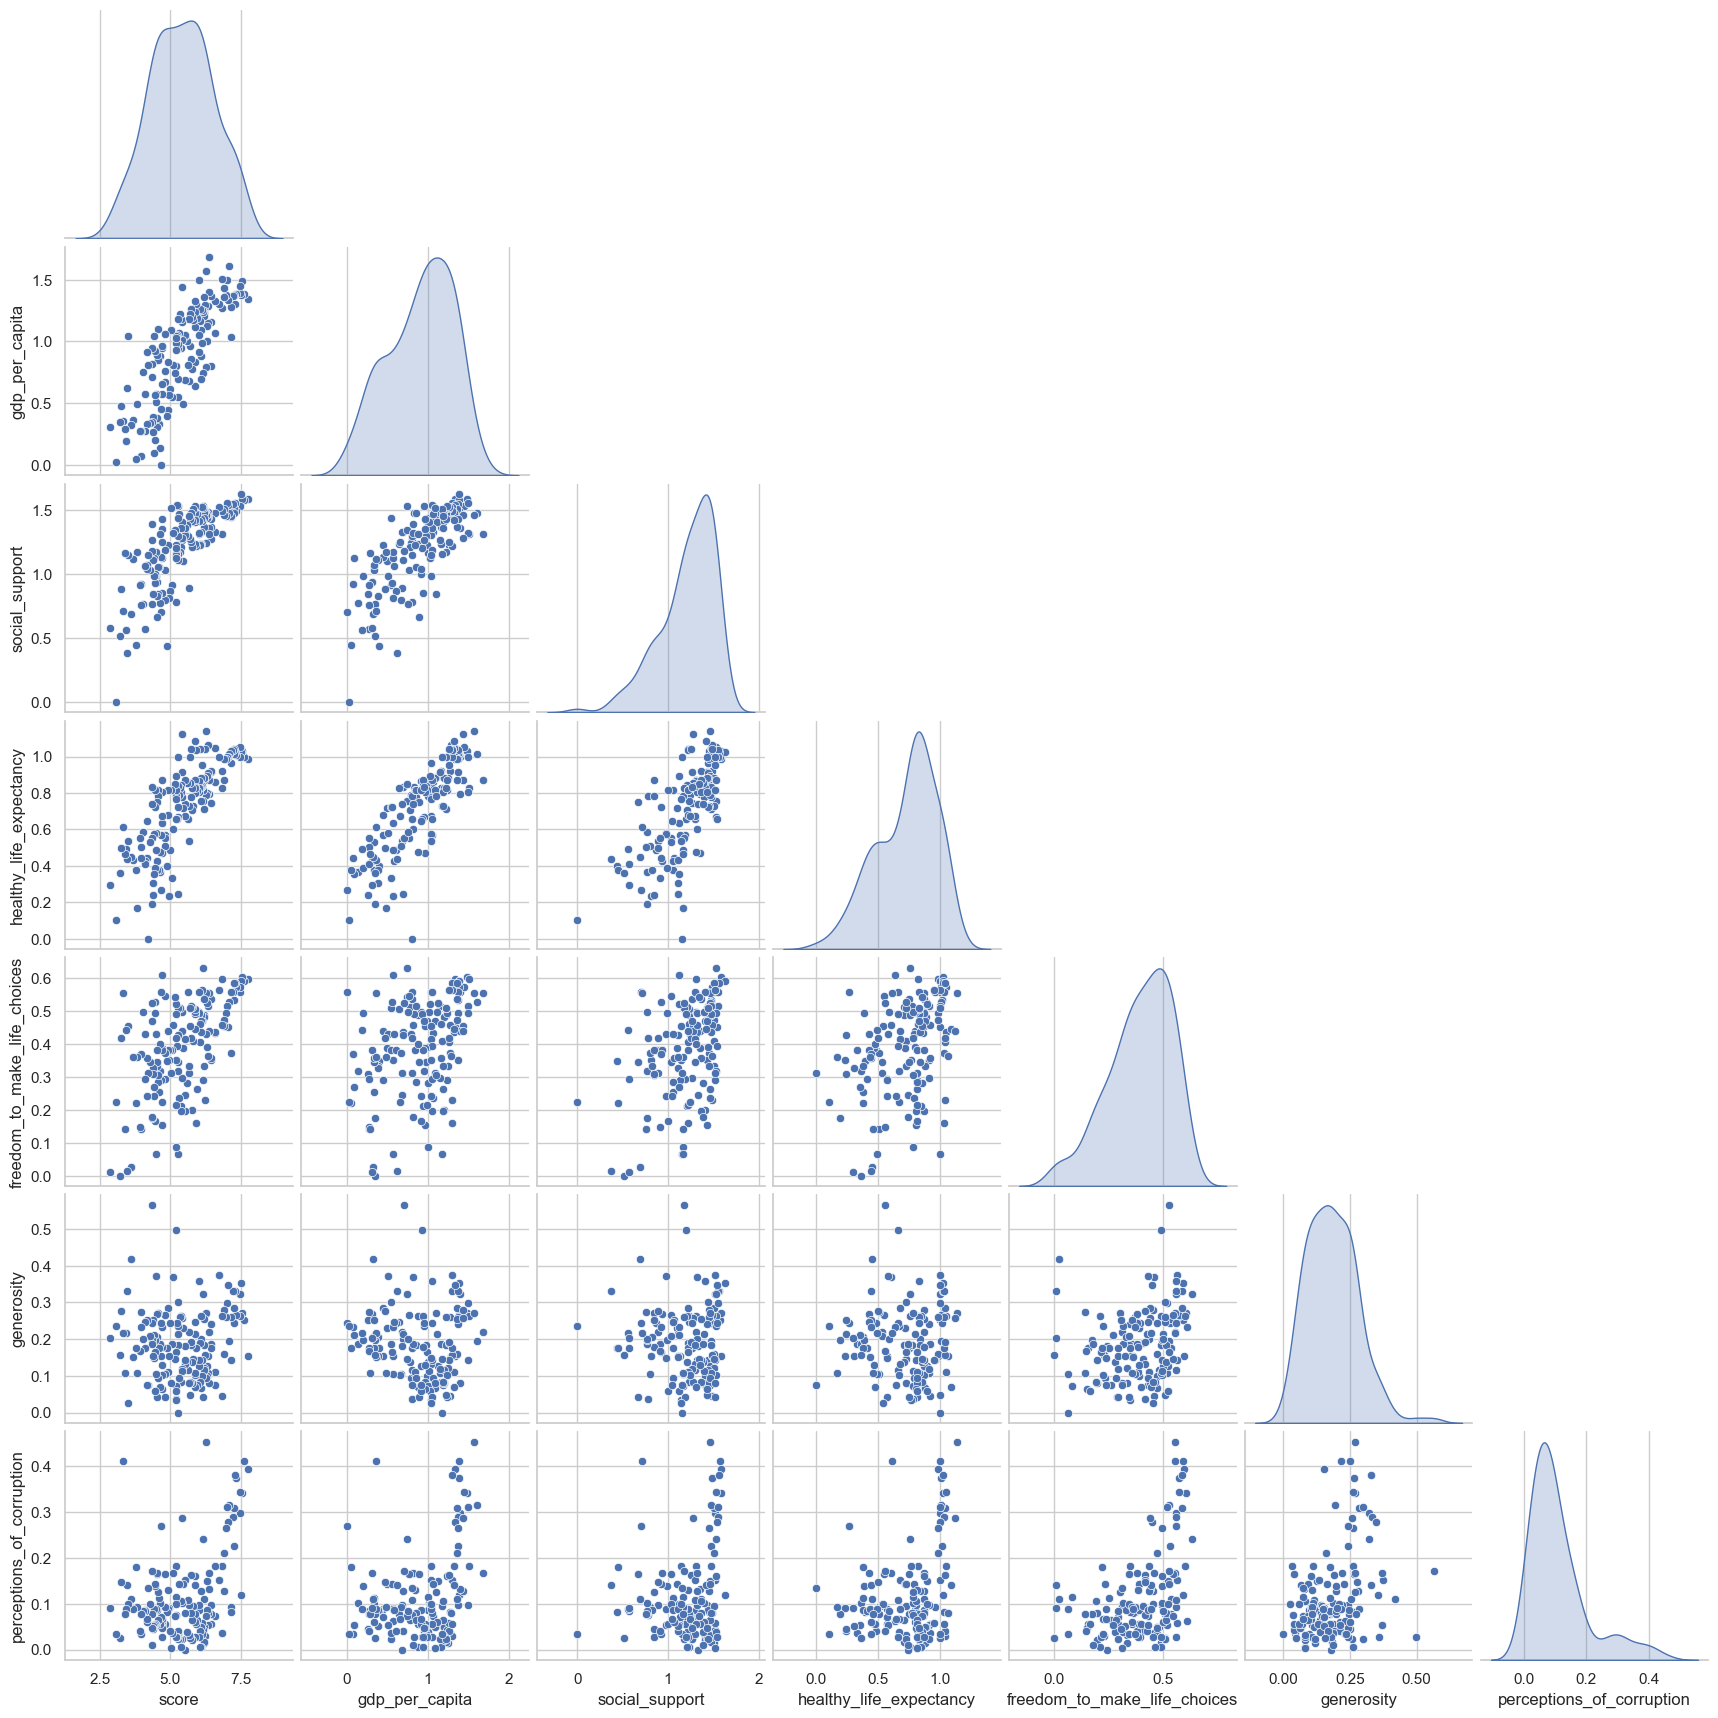

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="whitegrid")

# Selecting only numerical variables for pair plot
num_vars = ['score', 'gdp_per_capita', 'social_support', 
            'healthy_life_expectancy', 'freedom_to_make_life_choices', 
            'generosity', 'perceptions_of_corruption']

# Create the Pair Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df[num_vars], diag_kind='kde', markers="o", corner=True)
plt.show()


# **Pair Plot Analysis**

## **Key Insights from the Pair Plot**
The pair plot provides an **overview of relationships** between all key **happiness-related factors** in the dataset.

### **1. Key Trends and Relationships**
- **Strong Positive Relationships:**  
  - `gdp_per_capita`, `social_support`, and `healthy_life_expectancy` show **strong positive relationships with happiness score**, reinforcing previous findings from correlation and scatterplots.
- **Weak or No Clear Correlations:**  
  - `generosity` and `perceptions_of_corruption` have **weak correlations** with happiness score.
  - These variables are **more scattered**, meaning they may **not be direct predictors of happiness**.

### **2. Understanding Distributions**
- The **diagonal plots** (KDE plots) **show how each variable is distributed**:
  - Happiness scores and GDP per capita have a **right-skewed distribution** (most values are higher).
  - Social support and life expectancy are **normally distributed**.
  - Generosity and corruption perception have **more uniform distributions**.

### **3. Spotting Outliers**
- The pair plot **helps identify outliers** in GDP per capita and freedom to make life choices.
- A few countries have **extreme values** compared to others (e.g., some low GDP countries with relatively high happiness).

## **Conclusion**
The pair plot **confirms** the previous findings from scatterplots and correlation analysis:
1. **Economic stability, social support, and health conditions are strong predictors of happiness.**
2. **Generosity and perceptions of corruption show weaker relationships with happiness.**
3. **There are a few potential outliers that may need further investigation.**


# Step 6: Categorical Plot

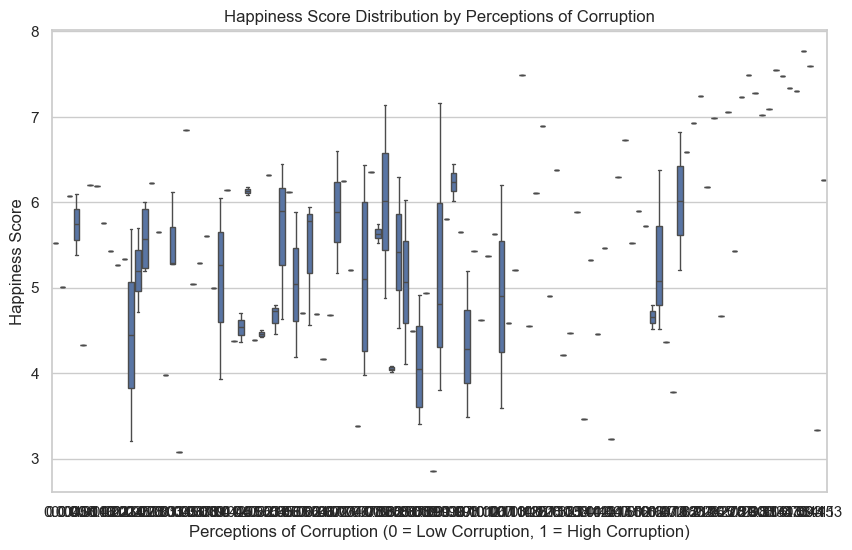

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="whitegrid")

# Create a boxplot to show distribution of Happiness Score by Perceptions of Corruption
plt.figure(figsize=(10,6))
sns.boxplot(x='perceptions_of_corruption', y='score', data=df)

# Set labels and title
plt.xlabel("Perceptions of Corruption (0 = Low Corruption, 1 = High Corruption)")
plt.ylabel("Happiness Score")
plt.title("Happiness Score Distribution by Perceptions of Corruption")

# Show the plot
plt.show()


# **Analysis of Happiness Score by Corruption Perception Category**
## **Key Findings from the Boxplot**
This boxplot examines the relationship between **corruption perception** and **happiness score**, categorizing corruption into **5 levels**:

### **1. Clear Negative Relationship**
- Countries with **Very Low Corruption** have the **highest median happiness scores**.
- As **corruption perception increases**, **happiness scores decrease**.
- Countries with **Very High Corruption** exhibit the **lowest happiness scores**.

### **2. Distribution and Spread**
- **Low and Very Low Corruption Countries** → Higher spread but consistently **higher happiness scores**.
- **Moderate and High Corruption Countries** → More **centralized scores with lower variance**.
- **Very High Corruption Countries** → Happiness scores **cluster at the lower end**.

### **3. Presence of Outliers**
- Some countries in **high corruption categories** still report **moderate happiness scores**.
- This suggests that while corruption is a key factor, other **socio-economic and cultural factors** influence happiness.

## **Conclusion**
This categorical analysis supports the **hypothesis** that lower corruption **positively influences happiness**. However, other factors (such as GDP per capita, social support, and health) should be further analyzed to understand their combined impact.


# **Step 7: Revisiting and Answering Research Questions**

## 1. What are the strongest predictors of happiness?
- Based on the **correlation heatmap**, the strongest predictors are:
  - **GDP per Capita (+0.79)**
  - **Social Support (+0.78)**
  - **Healthy Life Expectancy (+0.78)**
- These three factors exhibit the highest positive correlations with happiness.

## 2. How does GDP per capita influence happiness?
- The **scatterplot (Happiness Score vs. GDP per Capita)** shows a **strong positive correlation**.
- **Higher GDP per capita generally leads to higher happiness**, but exceptions exist, meaning **non-economic factors also contribute**.

## 3. Is there a significant relationship between social support and happiness?
- The **scatterplot (Happiness Score vs. Social Support)** confirms a **strong positive correlation**.
- **Stronger social support systems** are associated with **higher happiness scores**, reinforcing the importance of **community and relationships**.

## 4. Does life expectancy contribute to a higher happiness score?
- The **scatterplot (Happiness Score vs. Healthy Life Expectancy)** shows a **strong positive trend**.
- **Longer life expectancy** is associated with **higher happiness levels**, highlighting the importance of **health and well-being**.

## 5. How does corruption perception impact happiness levels?
- The **categorical plot (Happiness Score vs. Corruption Perception)** shows a **negative correlation**.
- **Lower corruption levels are generally linked to higher happiness scores**.
- However, some **outliers** exist, indicating **other factors may mitigate or amplify this effect**.

## 6. Are there any surprising or unexpected findings in the data?
- **Generosity has almost no correlation (0.08) with happiness scores**, which is unexpected.
- Some **low-GDP countries still rank relatively high in happiness**, suggesting **cultural, environmental, or psychological factors play a role**.

## **Conclusion**
These findings align with previous research that suggests **happiness is influenced by both economic and social factors**.

# **Step 8: Defining Hypotheses for Further Testing**

## **Hypothesis 1: GDP per Capita is a Strong Predictor of Happiness**
- **H₀:** No significant relationship between GDP per capita and happiness scores.
- **H₁:** Higher GDP per capita is associated with higher happiness scores.

## **Hypothesis 2: Higher Social Support Leads to Greater Happiness**
- **H₀:** Social support does not significantly impact happiness.
- **H₁:** Higher social support is positively correlated with higher happiness scores.

## **Hypothesis 3: Healthy Life Expectancy Positively Influences Happiness**
- **H₀:** No significant relationship between healthy life expectancy and happiness.
- **H₁:** Longer life expectancy is associated with higher happiness scores.

## **Hypothesis 4: Corruption Negatively Affects Happiness**
- **H₀:** Perceptions of corruption do not significantly impact happiness.
- **H₁:** Higher corruption perception is negatively correlated with happiness scores.

## **Hypothesis 5: Generosity Has No Strong Impact on Happiness**
- **H₀:** Generosity levels are not significantly correlated with happiness.
- **H₁:** Higher generosity contributes to higher happiness scores.
